## S-I-R model

System of differential equations:

$$
\begin{equation} \label{eq:originalmodel}
    \left\{
    \begin{array}{lll}
    \frac{dS}{dt} = -\frac{\beta SI}{N}   \\
    \frac{dI}{dt} = \frac{\beta SI}{N} - \gamma I \\
    \frac{dR}{dt} = \gamma I
    \end{array} \right.
\end{equation}
$$

Where   
$S = $ number of susceptible people  
$I = $ number of currently infected people  
$R = $ number of people that have recovered or died from the disease  

$N =$ "population size"  
$\beta =$ "infection rate"  
$\gamma =$ "recovery rate" (This should also include deaths)  

In [35]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Pull population and initial conditions from data

N = Population
S0 = population - total cases  
I0 = total cases - deaths - recovered  
R0 = deaths + recovered

In [ ]:
# Total population, N
N = country_population
deaths = country_deaths
#recovered = total_confirmed_cases - deaths


# Initial conditions
R0 = recovered + deaths
I0 = total_confirmed_cases - R0
S0 = N - I0 - R0 #note that S0 is also our upper limit

### Estimate parameters from Ryan's model

In [34]:
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days)
beta = 0.2
gamma = 1./14 #assume 14days is the recovery time 


# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations
def deriv(y, t, N, beta, gamma):
    S, I, R = y #initial conditions
    
    #model = system of differential equations
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

### Plot

In [ ]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

#### Example

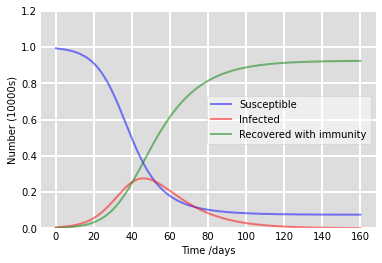

In [33]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 10000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 50, 20
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./14 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/10000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/10000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/10000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (10000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()